In [1]:
!pip install beautifulsoup4
!pip install lxml

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
url = "https://www.worldometers.info/coronavirus/"

page = requests.get(url)

In [4]:
page

<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<lin
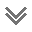

In [5]:
page.text

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
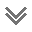

In [6]:
soup = BeautifulSoup(page.text, 'lxml')
soup

In [7]:
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [8]:
table1.find_all('th')

[<th width="1%">#</th>,
 <th width="100">Country,<br/>Other</th>,
 <th width="20">Total<br/>Cases</th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">New<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [9]:
table1.find_all('th')[4]

<th width="30">Total<br/>Deaths</th>

In [10]:
table1.find_all('th')[4].text

'TotalDeaths'

In [11]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

In [12]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [13]:
headers[13]

'Tests/\n1M pop\n'

In [14]:
headers[13]="Tests per 1M pop"

In [15]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests per 1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [16]:
mydata = pd.DataFrame(columns = headers)
mydata

Empty DataFrame
Columns: [#, Country,Other, TotalCases, NewCases, TotalDeaths, NewDeaths, TotalRecovered, NewRecovered, ActiveCases, Serious,Critical, Tot Cases/1M pop, Deaths/1M pop, TotalTests, Tests per 1M pop, Population, Continent, 1 Caseevery X ppl, 1 Deathevery X ppl, 1 Testevery X ppl, New Cases/1M pop, New Deaths/1M pop, Active Cases/1M pop]
Index: []

[0 rows x 22 columns]

In [17]:
table1.find_all('tr')[1:]

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>123,620,045</td>
 <td></td>
 <td>1,600,048</td>
 <td></td>
 <td>118,524,511</td>
 <td>+2,314</td>
 <td>3,495,486</td>
 <td>8,520</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <!-- 1 Case every X -->
 <td>
 </td>
 <!-- 1 Death every X -->
 <td></td>
 <!-- 1 test every X -->
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>213,010,242</td>
 <td>+14,528</td>
 <td>1,530,386</td>
 <td>+22</td>
 <td>197,484,637</td>
 <td>+40,062</td>
 <td>13,995,219</td>
 <td>15,848</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="displa

In [18]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row # appending each row into the Pandas dataframe




In [19]:
mydata

#       Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0       \nNorth America\n  123,620,045            1,600,048             
1                \nAsia\n  213,010,242  +14,528   1,530,386       +22   
2              \nEurope\n  244,936,919            2,007,543             
3       \nSouth America\n   67,755,348            1,347,872             
4             \nOceania\n   13,905,992               25,446             
..  ..                ...          ...      ...         ...       ...   
242                Total:   67,755,348            1,347,872             
243                Total:   13,905,992               25,446             
244                Total:   12,778,593              258,523             
245                Total:          721                   15             
246                Total:  676,007,860  +14,528   6,769,833       +22   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ... TotalTests  \
0      118,524,511       +2,314   3,495,486            8,520  ...              
1      197,484,637      +40,062  13,995,219           15,848  ...              
2      240,653,548      +10,464   2,275,828            6,502  ...              
3       65,877,299       +3,503     530,177           10,230  ...              
4       13,743,748                  136,798               78  ...              
..             ...          ...         ...              ...  ...        ...   
242     65,877,299                  530,177           10,230  ...              
243     13,743,748                  136,798               78  ...              
244     12,063,397                  456,673              547  ...              
245            706                        0                0  ...              
246    648,347,846      +56,343  20,890,181           41,725  ...              

    Tests per 1M pop Population          Continent 1 Caseevery X ppl  \
0                                    North America                \n   
1                                             Asia                \n   
2                                           Europe                \n   
3                                    South America                \n   
4                                Australia/Oceania                \n   
..               ...        ...                ...               ...   
242                                  South America                     
243                              Australia/Oceania                     
244                                         Africa                     
245                                                                    
246                                            All                \n   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                 ...               ...              ...               ...   
242                                                                           
243                                                                           
244                                                                           
245                                                                           
246                                                                           

    Active Cases/1M pop  
0                        
1                        
2                        
3                        
4                        
..                  ...  
242                      
243                      
244                      
245                      
246                      

[247 rows x 22 columns]

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

url = "http://www.mfd.gov.np/weather/"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

right_table=soup.find('table', class_='table')

right_table


<table class="table" style="margin-bottom: 0px"><tr><th>Station</th><th class="center dark">Maximum Temp.*<br/>(°C)</th><th class="center">Minimum Temp.<br/>(°C)</th><th class="center">24 hrs Rainfall<br/>(mm)</th></tr><tr><td>Dadeldhura</td><td class="center dark">17.6</td><td class="center">5.6</td><td class="center">0.0</td></tr><tr><td>Dipayal</td><td class="center dark">25.0</td><td class="center">8.6</td><td class="center">0.0</td></tr><tr><td>Dhangadi</td><td class="center dark">24.8</td><td class="center">10.0</td><td class="center">0.0</td></tr><tr><td>Birendranagar</td><td class="center dark">24.6</td><td class="center">6.9</td><td class="center">0.0</td></tr><tr><td>Nepalgunj</td><td class="center dark">25.4</td><td class="center">9.8</td><td class="center">0.0</td></tr><tr><td>Jumla</td><td class="center dark">15.1</td><td class="center">-2.5</td><td class="center">0.0</td></tr><tr><td>Ghorahi</td><td class="center dark">24.4</td><td class="center">9.9</td><td class="center

In [2]:
right_table.find_all('th')

[<th>Station</th>,
 <th class="center dark">Maximum Temp.*<br/>(°C)</th>,
 <th class="center">Minimum Temp.<br/>(°C)</th>,
 <th class="center">24 hrs Rainfall<br/>(mm)</th>]

In [3]:
right_table.find_all('tr')[:-1]

[<tr><th>Station</th><th class="center dark">Maximum Temp.*<br/>(°C)</th><th class="center">Minimum Temp.<br/>(°C)</th><th class="center">24 hrs Rainfall<br/>(mm)</th></tr>,
 <tr><td>Dadeldhura</td><td class="center dark">17.6</td><td class="center">5.6</td><td class="center">0.0</td></tr>,
 <tr><td>Dipayal</td><td class="center dark">25.0</td><td class="center">8.6</td><td class="center">0.0</td></tr>,
 <tr><td>Dhangadi</td><td class="center dark">24.8</td><td class="center">10.0</td><td class="center">0.0</td></tr>,
 <tr><td>Birendranagar</td><td class="center dark">24.6</td><td class="center">6.9</td><td class="center">0.0</td></tr>,
 <tr><td>Nepalgunj</td><td class="center dark">25.4</td><td class="center">9.8</td><td class="center">0.0</td></tr>,
 <tr><td>Jumla</td><td class="center dark">15.1</td><td class="center">-2.5</td><td class="center">0.0</td></tr>,
 <tr><td>Ghorahi</td><td class="center dark">24.4</td><td class="center">9.9</td><td class="center">0.0</td></tr>,
 <tr><td>

In [4]:
# Obtain every title of columns with tag <th>
headers = []
for i in right_table.find_all('th'):
    title = i.text
    headers.append(title)

In [5]:
headers

['Station', 'Maximum Temp.*(°C)', 'Minimum Temp.(°C)', '24 hrs Rainfall(mm)']

In [6]:
mydata = pd.DataFrame(columns = headers)
mydata

Empty DataFrame
Columns: [Station, Maximum Temp.*(°C), Minimum Temp.(°C), 24 hrs Rainfall(mm)]
Index: []

In [7]:
right_table.find_all('tr')[1:-1]

[<tr><td>Dadeldhura</td><td class="center dark">17.6</td><td class="center">5.6</td><td class="center">0.0</td></tr>,
 <tr><td>Dipayal</td><td class="center dark">25.0</td><td class="center">8.6</td><td class="center">0.0</td></tr>,
 <tr><td>Dhangadi</td><td class="center dark">24.8</td><td class="center">10.0</td><td class="center">0.0</td></tr>,
 <tr><td>Birendranagar</td><td class="center dark">24.6</td><td class="center">6.9</td><td class="center">0.0</td></tr>,
 <tr><td>Nepalgunj</td><td class="center dark">25.4</td><td class="center">9.8</td><td class="center">0.0</td></tr>,
 <tr><td>Jumla</td><td class="center dark">15.1</td><td class="center">-2.5</td><td class="center">0.0</td></tr>,
 <tr><td>Ghorahi</td><td class="center dark">24.4</td><td class="center">9.9</td><td class="center">0.0</td></tr>,
 <tr><td>Pokhara</td><td class="center dark">24.0</td><td class="center">10.1</td><td class="center">0.0</td></tr>,
 <tr><td>Bhairahawa</td><td class="center dark">20.6</td><td class=

In [8]:
# Create a for loop to fill mydata
for j in right_table.find_all('tr')[1:-1]:
    length = len(mydata) # appending each row into the Pandas dataframe
     
    row = [td.get_text(strip=True) for td in j.find_all('td')]
    df = pd.concat([pd.DataFrame(mydata)], axis=0)
print(df)
df

Empty DataFrame
Columns: [Station, Maximum Temp.*(°C), Minimum Temp.(°C), 24 hrs Rainfall(mm)]
Index: []


Empty DataFrame
Columns: [Station, Maximum Temp.*(°C), Minimum Temp.(°C), 24 hrs Rainfall(mm)]
Index: []

In [9]:
mydata

Empty DataFrame
Columns: [Station, Maximum Temp.*(°C), Minimum Temp.(°C), 24 hrs Rainfall(mm)]
Index: []

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "http://www.mfd.gov.np/weather/"
html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')
right_table=soup.find('table')

# Create a list to store the data
data = []

for j in right_table.find_all('tr')[1:-1]:
    row = [td.get_text(strip=True) for td in j.find_all('td')]
    data.append(row)

# Create the dataframe from the list
mydata = pd.DataFrame(data, columns=["Max_Temp", "Min_Temp", "Station", "Location"])

# Show the dataframe
print(mydata)
#This code will print the dataframe with all the information in the table.






         Max_Temp Min_Temp Station Location
0      Dadeldhura     17.6     5.6      0.0
1         Dipayal     25.0     8.6      0.0
2        Dhangadi     24.8    10.0      0.0
3   Birendranagar     24.6     6.9      0.0
4       Nepalgunj     25.4     9.8      0.0
5           Jumla     15.1    -2.5      0.0
6         Ghorahi     24.4     9.9      0.0
7         Pokhara     24.0    10.1      0.0
8      Bhairahawa     20.6    11.2      0.0
9          Simara     23.0     8.6      0.0
10      Kathmandu     21.3     6.9      0.0
11    Okhaldhunga     17.0     7.1      0.0
12      Taplejung     16.8     5.5      0.0
13       Dhankuta     22.1     8.5      0.0
14     Biratnagar     24.3    10.5      0.0
15       Janakpur     25.2    12.6      0.0


In [11]:
mydata.loc[0]

Max_Temp    Dadeldhura
Min_Temp          17.6
Station            5.6
Location           0.0
Name: 0, dtype: object